<a href="https://colab.research.google.com/github/RijaZaineb/bells-palsy/blob/main/Clinical_Trials_Bells_Palsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas seaborn matplotlib lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 1.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=90a005b1d46e759997e07a92484059158eb17beb3097c730d29da8d625c53816
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from lifelines import KaplanMeierFitter

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clinical Trials/Bells Palsy Clinical Trial.csv')

# Display the first few rows
df.head()

,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
0,1,Female,77,6,Within 24 hr,Prednisolone–Placebo,Yes,No,2,No,2,No
1,2,Female,61,6,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
2,3,Female,46,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
3,4,Female,46,3,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
4,5,Female,42,3,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Patient ID,0
Sex,0
Age,0
Baseline Score on House–Brackmann scale,0
Time between onset of symptoms and start of treatment,0
Treatment Group,0
Received Prednisolone,0
Received Acyclovir,0
3-Month Score on House–Brackmann scale,0
Full Recovery in 3 Months,0


No nulls found

In [ ]:
df.dtypes

,0
Patient ID,int64
Sex,object
Age,int64
Baseline Score on House–Brackmann scale,int64
Time between onset of symptoms and start of treatment,object
Treatment Group,object
Received Prednisolone,object
Received Acyclovir,object
3-Month Score on House–Brackmann scale,int64
Full Recovery in 3 Months,object


In [ ]:
df.shape

(494, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Patient ID                                             494 non-null    int64 
 1   Sex                                                    494 non-null    object
 2   Age                                                    494 non-null    int64 
 3   Baseline Score on House–Brackmann scale                494 non-null    int64 
 4   Time between onset of symptoms and start of treatment  494 non-null    object
 5   Treatment Group                                        494 non-null    object
 6   Received Prednisolone                                  494 non-null    object
 7   Received Acyclovir                                     494 non-null    object
 8   3-Month Score on House–Brackmann scale                 494 n

In [ ]:
df.describe(include = 'all')

,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
count,494.000000,494,494.000000,494.000000,494,494,494,494,494.000000,494,494.000000,494
unique,NaN,2,NaN,NaN,4,4,2,2,NaN,2,NaN,2
top,NaN,Male,NaN,NaN,Within 24 hr,Acyclovir–Prednisolone,Yes,Yes,NaN,Yes,NaN,Yes
freq,NaN,256,NaN,NaN,249,127,250,249,NaN,358,NaN,441
mean,247.500000,NaN,44.868421,3.680162,NaN,NaN,NaN,NaN,1.340081,NaN,1.143725,NaN
std,142.749781,NaN,14.550357,1.131752,NaN,NaN,NaN,NaN,0.609037,NaN,0.461050,NaN
min,1.000000,NaN,16.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN
25%,124.250000,NaN,34.000000,3.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN
50%,247.500000,NaN,44.000000,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN
75%,370.750000,NaN,55.000000,4.000000,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000,NaN


**Exploratory Data Analysis**

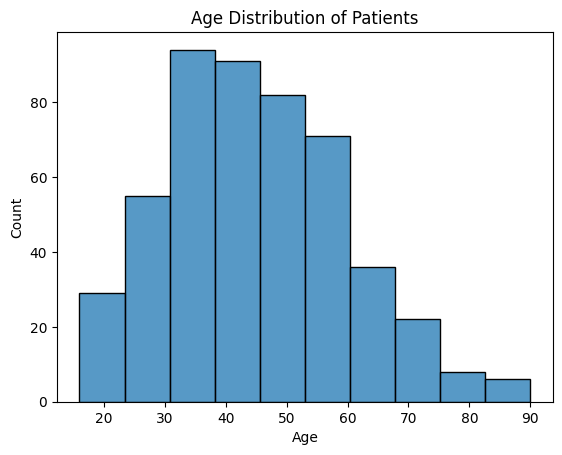

In [ ]:
sns.histplot(df['Age'], bins=10)
plt.title('Age Distribution of Patients')
plt.show()

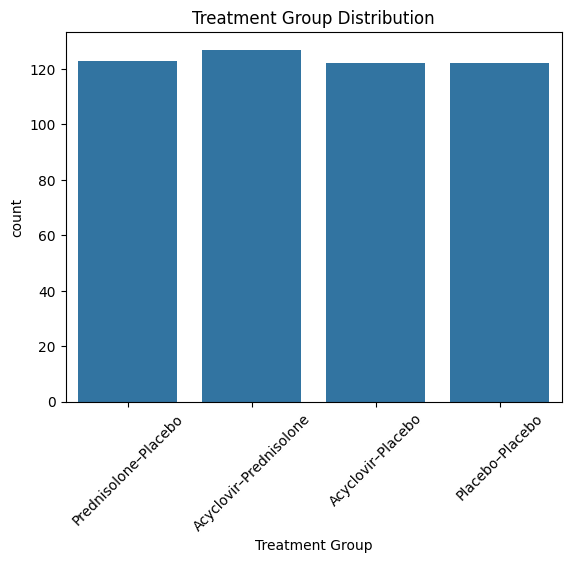

In [ ]:
sns.countplot(x='Treatment Group', data=df, width = 0.8)
plt.title('Treatment Group Distribution')
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.show()

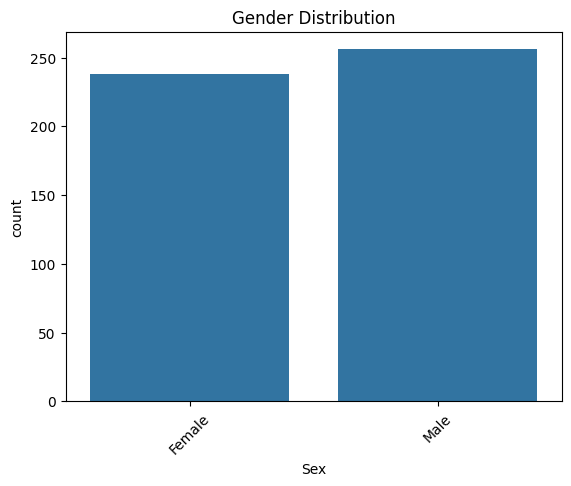

In [ ]:
sns.countplot(x='Sex', data=df, width = 0.8)
plt.title('Gender Distribution')
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.show()

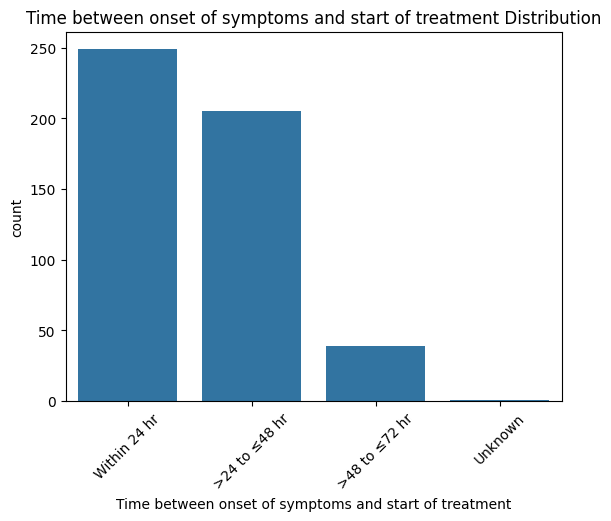

In [ ]:
sns.countplot(x='Time between onset of symptoms and start of treatment', data=df, width = 0.8)
plt.title('Time between onset of symptoms and start of treatment Distribution')
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group by 'Treatment Group' and count the number of patients in each group
time_group_counts = df.groupby('Time between onset of symptoms and start of treatment').size().reset_index(name='Count')

# Display the table
print(time_group_counts)

  Time between onset of symptoms and start of treatment  Count
0                                      >24 to ≤48 hr       205
1                                      >48 to ≤72 hr        39
2                                            Unknown         1
3                                       Within 24 hr       249


In [ ]:
df['Time between onset of symptoms and start of treatment'] = df['Time between onset of symptoms and start of treatment'].str.strip()
df = df[df['Time between onset of symptoms and start of treatment'] != 'Unknown']

In [ ]:
df['Time between onset of symptoms and start of treatment'].unique()

array(['Within 24 hr', '>24 to ≤48 hr', '>48 to ≤72 hr'], dtype=object)

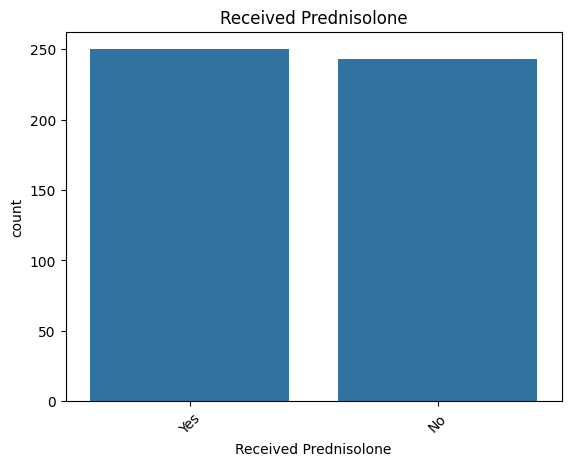

In [ ]:
sns.countplot(x='Received Prednisolone', data=df, width = 0.8)
plt.title('Received Prednisolone')
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.show()

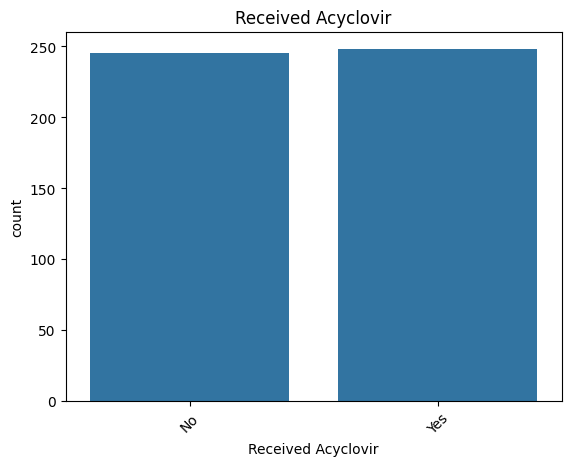

In [ ]:
sns.countplot(x='Received Acyclovir', data=df, width = 0.8)
plt.title('Received Acyclovir')
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[df['Received Acyclovir'] != 'Yes']

,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
0,1,Female,77,6,Within 24 hr,Prednisolone–Placebo,Yes,No,2,No,2,No
1,2,Female,61,6,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
2,3,Female,46,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
3,4,Female,46,3,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
4,5,Female,42,3,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
489,490,Male,40,5,>24 to ≤48 hr,Placebo–Placebo,No,No,2,No,2,No
490,491,Male,37,3,>24 to ≤48 hr,Placebo–Placebo,No,No,1,Yes,1,Yes
491,492,Female,56,3,>24 to ≤48 hr,Placebo–Placebo,No,No,1,Yes,1,Yes
492,493,Male,33,4,Within 24 hr,Placebo–Placebo,No,No,1,Yes,1,Yes


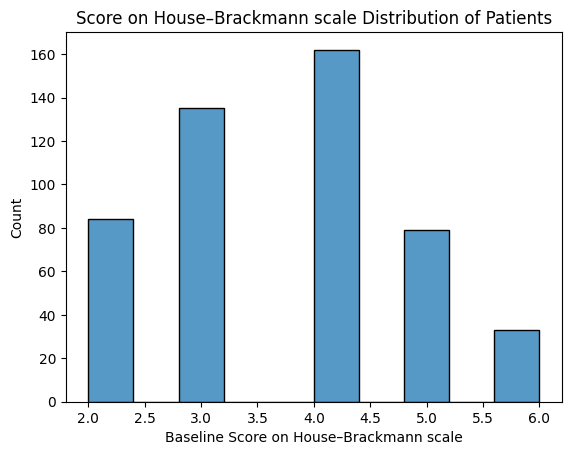

In [ ]:
sns.histplot(df['Baseline Score on House–Brackmann scale'], bins=10)
plt.title('Score on House–Brackmann scale Distribution of Patients')
plt.show()

In [ ]:
df['Baseline Score on House–Brackmann scale'].unique()

array([6, 4, 3, 2, 5])

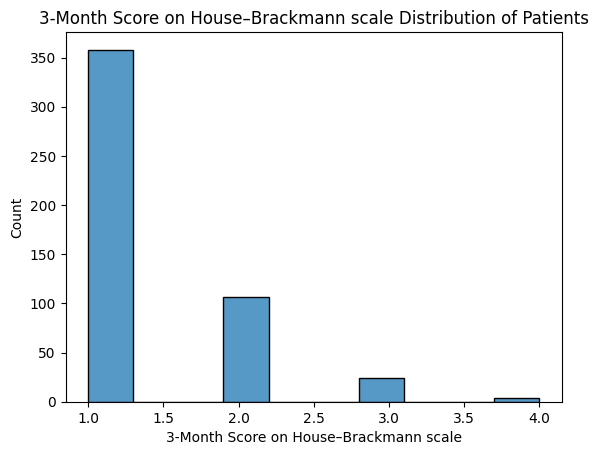

In [ ]:
sns.histplot(df['3-Month Score on House–Brackmann scale'], bins=10)
plt.title('3-Month Score on House–Brackmann scale Distribution of Patients')
plt.show()

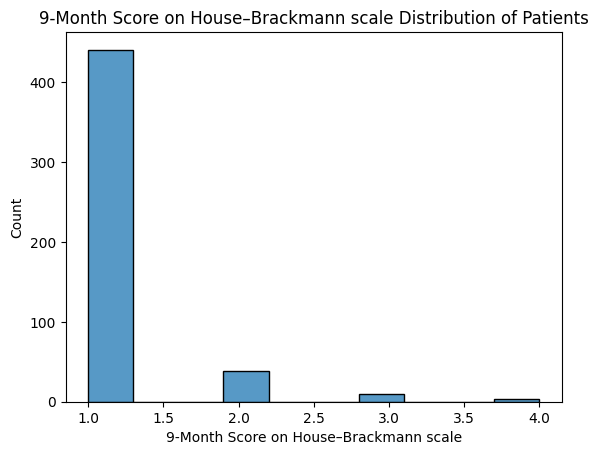

In [ ]:
sns.histplot(df['9-Month Score on House–Brackmann scale'], bins=10)
plt.title('9-Month Score on House–Brackmann scale Distribution of Patients')
plt.show()

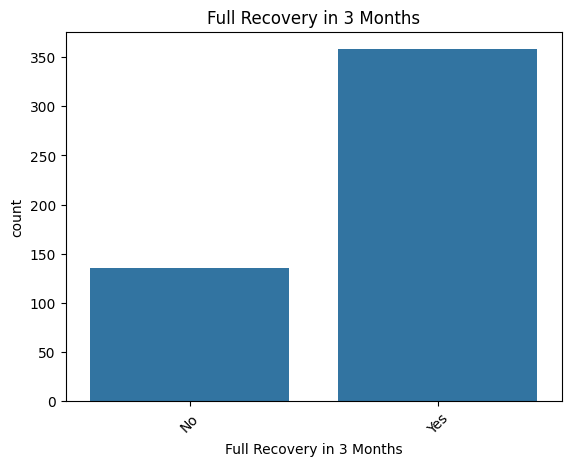

In [ ]:
sns.countplot(x='Full Recovery in 3 Months', data=df, width = 0.8)
plt.title('Full Recovery in 3 Months')
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.show()

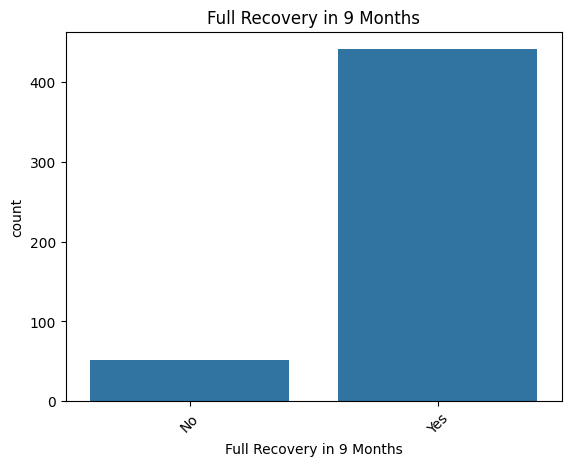

In [ ]:
sns.countplot(x='Full Recovery in 9 Months', data=df, width = 0.8)
plt.title('Full Recovery in 9 Months')
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.show()

**Correlation Analysis**

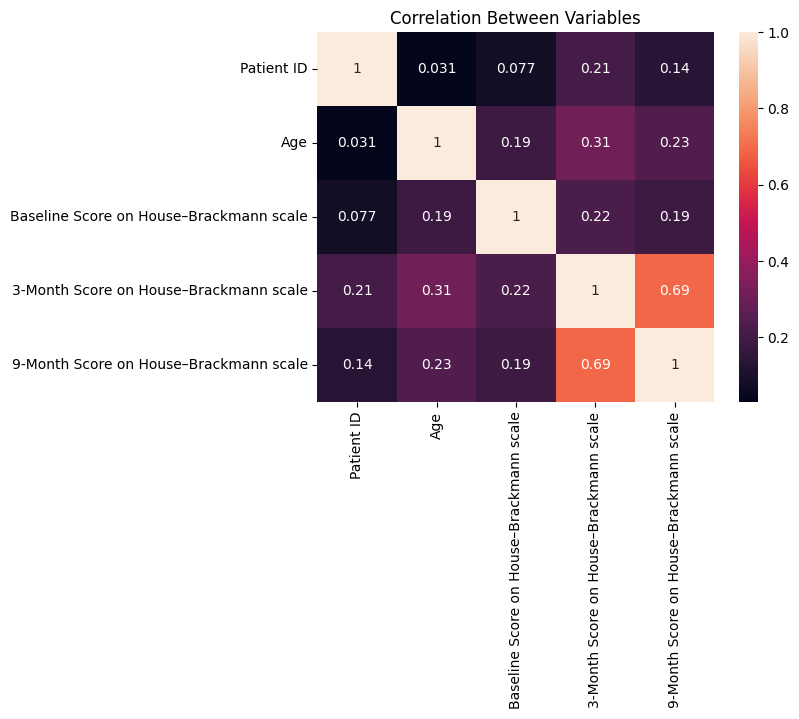

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True)
plt.title('Correlation Between Variables')
plt.show()

**Outlier Detection**

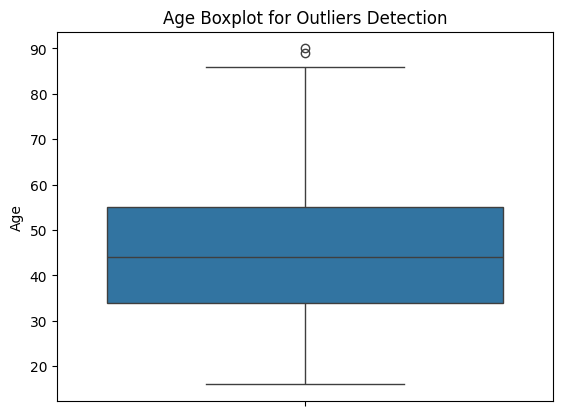

In [ ]:
sns.boxplot(df['Age'])
plt.title('Age Boxplot for Outliers Detection')
plt.show()

**Treatment Effectiveness**

In [ ]:
# Group Patients by Treatment Group
treatment_groups = df.groupby('Treatment Group')

In [ ]:
# Compare recovery rates
treatment_groups['3-Month Score on House–Brackmann scale'].describe()

,count,mean,std,min,25%,50%,75%,max
Treatment Group,,,,,,,,
Acyclovir–Placebo,121.0,1.471074,0.684037,1.0,1.0,1.0,2.0,4.0
Acyclovir–Prednisolone,127.0,1.244094,0.515113,1.0,1.0,1.0,1.0,3.0
Placebo–Placebo,122.0,1.475410,0.718275,1.0,1.0,1.0,2.0,4.0
Prednisolone–Placebo,123.0,1.170732,0.418963,1.0,1.0,1.0,1.0,3.0


In [ ]:
# Compare recovery rates
treatment_groups['9-Month Score on House–Brackmann scale'].describe()

,count,mean,std,min,25%,50%,75%,max
Treatment Group,,,,,,,,
Acyclovir–Placebo,121.0,1.206612,0.561506,1.0,1.0,1.0,1.0,4.0
Acyclovir–Prednisolone,127.0,1.086614,0.333895,1.0,1.0,1.0,1.0,3.0
Placebo–Placebo,122.0,1.213115,0.578249,1.0,1.0,1.0,1.0,4.0
Prednisolone–Placebo,123.0,1.065041,0.278751,1.0,1.0,1.0,1.0,3.0


In [ ]:
# Replace any non-standard dashes with a regular hyphen
df['Treatment Group'] = df['Treatment Group'].str.replace('–', '-')

In [ ]:
# ANOVA and t-test
from scipy import stats
f_statistic, p_value = stats.f_oneway(
    df[df['Treatment Group'] == 'Prednisolone-Placebo']['3-Month Score on House–Brackmann scale'],
    df[df['Treatment Group'] == 'Acyclovir-Prednisolone']['3-Month Score on House–Brackmann scale'],
    df[df['Treatment Group'] == 'Acyclovir-Placebo']['3-Month Score on House–Brackmann scale'],
    df[df['Treatment Group'] == 'Placebo-Placebo']['3-Month Score on House–Brackmann scale']
)
print(f_statistic, p_value)

8.465985647334982 1.7119451611369357e-05


**F-Statistic:** The F-statistic of 8.47 indicates that there is considerable variation between the means of the treatment groups.

**p-Value:** The p-value of 1.71e-05 is much smaller than the standard significance level (0.05), suggesting a statistically significant difference in the 3-month recovery scores across the treatment groups.

These results indicate that the type of treatment significantly impacts recovery at the 3-month mark, warranting further investigation into which specific treatments are more effective.

In [ ]:
# ANOVA and t-test
from scipy import stats
f_statistic, p_value = stats.f_oneway(
    df[df['Treatment Group'] == 'Prednisolone-Placebo']['9-Month Score on House–Brackmann scale'],
    df[df['Treatment Group'] == 'Acyclovir-Prednisolone']['9-Month Score on House–Brackmann scale'],
    df[df['Treatment Group'] == 'Acyclovir-Placebo']['9-Month Score on House–Brackmann scale'],
    df[df['Treatment Group'] == 'Placebo-Placebo']['9-Month Score on House–Brackmann scale']
)
print(f_statistic, p_value)

3.5862428269499964 0.013758544075885629


**F-Statistic:** The F-statistic is 3.59, indicating moderate variability in recovery outcomes across the treatment groups at the 9-month mark.

**p-Value:** The p-value is 0.0138, which is less than the 0.05 threshold, suggesting that there is a statistically significant difference between the groups' 9-month recovery scores.

Conclusion: While there is still a significant difference at 9 months, the effect is weaker compared to the 3-month mark, indicating that recovery outcomes may converge over time across treatments.

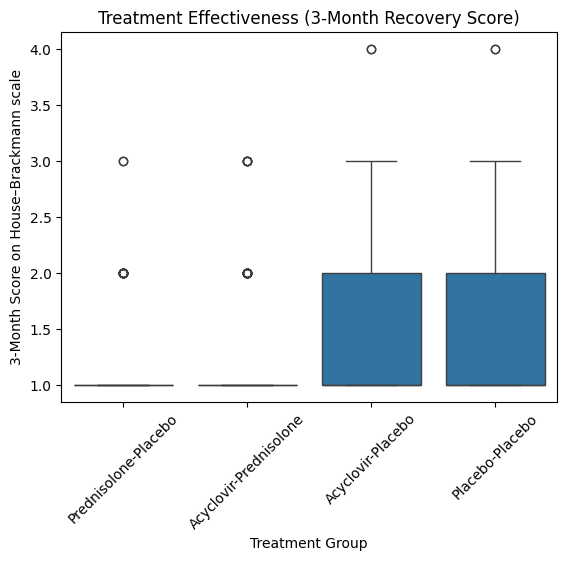

In [ ]:
sns.boxplot(x='Treatment Group', y='3-Month Score on House–Brackmann scale', data=df)
plt.title("Treatment Effectiveness (3-Month Recovery Score)")
plt.xticks(rotation=45)
plt.show()

**Key Points**

*1. Variation in Recovery Across Groups:* Patients in the Acyclovir–Placebo and Placebo–Placebo groups show a wider range of recovery scores, as indicated by the taller boxes and whiskers. This suggests greater variability in recovery within these groups.

*2. Lower Scores in Prednisolone-Based Groups:* Prednisolone–Placebo and Acyclovir–Prednisolone groups have consistently lower scores (mostly around 1), indicating better recovery outcomes by 3 months for these treatments.

*3. Outliers Present:* Some patients in all groups have recovery scores of 2 or higher, representing outliers with slower recovery.

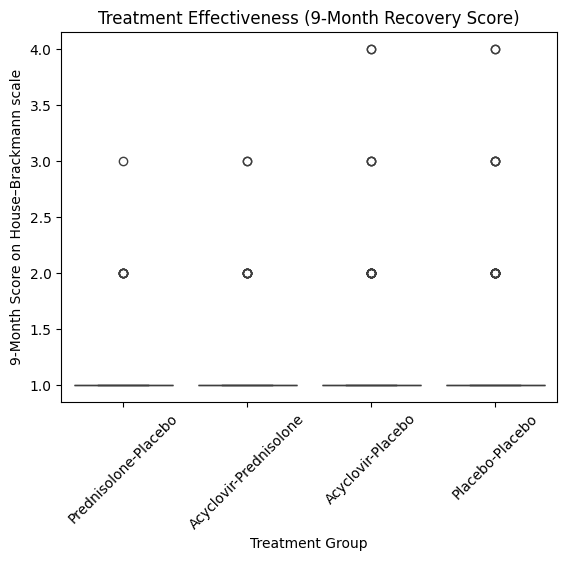

In [ ]:
sns.boxplot(x='Treatment Group', y='9-Month Score on House–Brackmann scale', data=df)
plt.title("Treatment Effectiveness (9-Month Recovery Score)")
plt.xticks(rotation=45)
plt.show()

**Key Points**

*1. Consistent Recovery Across Groups:* Most patients across all treatment groups have a recovery score of 1 at the 9-month mark, indicating high recovery levels and consistent outcomes.

*2. Few Outliers:* A small number of patients have scores of 2 or 3, suggesting that full recovery was not achieved for everyone, but these cases are minimal.

*3. Similar Effectiveness:* All treatment groups show similar patterns, suggesting that treatment type may not significantly impact 9-month recovery outcomes.

In [ ]:
df['Recovery Improvement'] = df['3-Month Score on House–Brackmann scale'] - df['9-Month Score on House–Brackmann scale']

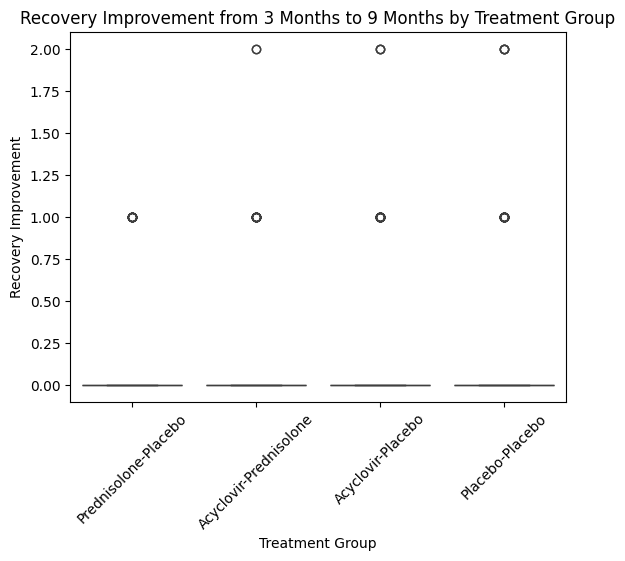

In [ ]:
sns.boxplot(x='Treatment Group', y='Recovery Improvement', data=df)
plt.title("Recovery Improvement from 3 Months to 9 Months by Treatment Group")
plt.xticks(rotation=45)
plt.show()

**Key Insights**

*1. Minimal Improvement Across Groups:* Most patients in all treatment groups show little to no improvement from 3 months to 9 months, as seen by values close to zero.

*2. Outliers in Recovery:* A few outliers in each group have a recovery improvement score of 1 or above, indicating continued progress in recovery for some patients beyond the initial 3 months.

*3. Similar Improvement Trends:* The recovery improvement trend is similar across all treatment groups, suggesting that additional treatment benefits may not vary significantly between groups over this period.

**Investigating Outliers**

In [ ]:
outliers = df[df['Recovery Improvement'] > 0]
print(outliers[['Patient ID', 'Age', 'Sex', 'Treatment Group', 'Recovery Improvement']])

     Patient ID  Age     Sex       Treatment Group  Recovery Improvement
23           24   61  Female  Prednisolone-Placebo                     1
32           33   58    Male  Prednisolone-Placebo                     1
35           36   53    Male  Prednisolone-Placebo                     1
36           37   69  Female  Prednisolone-Placebo                     1
38           39   68  Female  Prednisolone-Placebo                     1
..          ...  ...     ...                   ...                   ...
465         466   42  Female       Placebo-Placebo                     1
473         474   50  Female       Placebo-Placebo                     1
484         485   60  Female       Placebo-Placebo                     1
486         487   60    Male       Placebo-Placebo                     1
487         488   40  Female       Placebo-Placebo                     1

[88 rows x 5 columns]


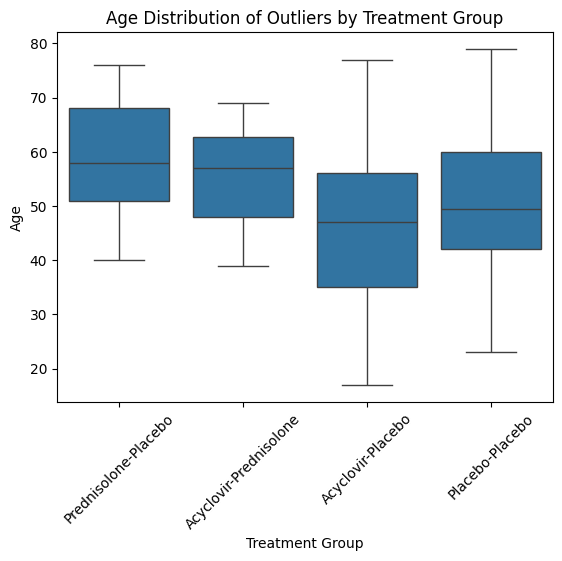

In [ ]:
# Analyze age
sns.boxplot(x='Treatment Group', y='Age', data=outliers)
plt.title("Age Distribution of Outliers by Treatment Group")
plt.xticks(rotation=45)
plt.show()

**Key Notes on Age Distribution**

*1. Prednisolone–Placebo:* Outliers in this group are generally older, with a median age around 60–65, suggesting that delayed recovery is more common in older patients here.

*2. Acyclovir–Prednisolone:* Outliers are slightly younger, with a median age around 55, showing that age may influence recovery differently in this group.

*3. Acyclovir–Placebo and Placebo–Placebo:* These groups have a wider age range among outliers, spanning younger to older ages, indicating that delayed recovery affects a broad age group.

In [ ]:
outlier_counts_sex = outliers.groupby(['Treatment Group', 'Sex']).size().reset_index(name='Count')
print(outlier_counts_sex)

          Treatment Group     Sex  Count
0       Acyclovir-Placebo  Female      9
1       Acyclovir-Placebo    Male     20
2  Acyclovir-Prednisolone  Female      8
3  Acyclovir-Prednisolone    Male     10
4         Placebo-Placebo  Female     16
5         Placebo-Placebo    Male     12
6    Prednisolone-Placebo  Female      6
7    Prednisolone-Placebo    Male      7


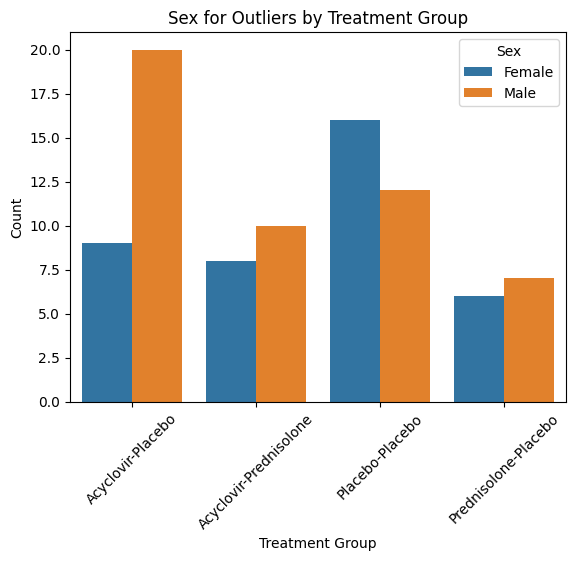

In [ ]:
sns.barplot(x='Treatment Group', y='Count', hue='Sex', data=outlier_counts_sex)
plt.title("Sex for Outliers by Treatment Group")
plt.xticks(rotation = 45)
plt.show()

The similar distribution of male and female outliers across the treatment groups doesn’t suggest any significant gender-related patterns in delayed recovery

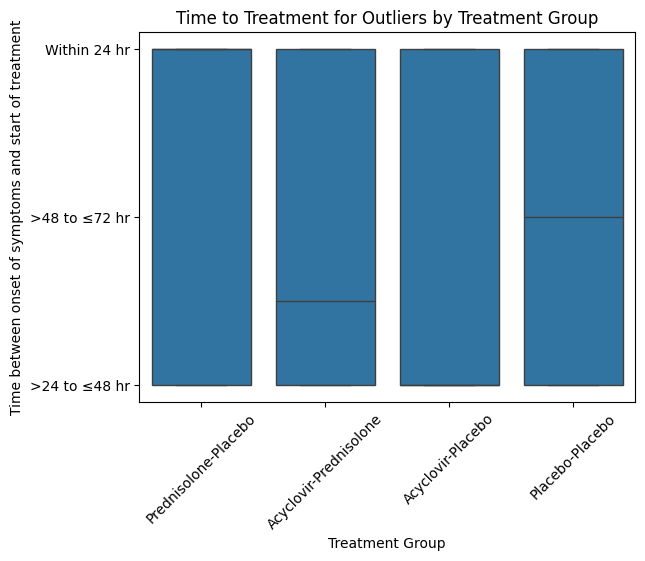

In [ ]:
sns.boxplot(x='Treatment Group', y='Time between onset of symptoms and start of treatment', data=outliers)
plt.title("Time to Treatment for Outliers by Treatment Group")
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_counts = outliers.groupby(['Treatment Group', 'Time between onset of symptoms and start of treatment']).size().reset_index(name='Count')
print(outlier_counts)

           Treatment Group  \
0        Acyclovir-Placebo   
1        Acyclovir-Placebo   
2        Acyclovir-Placebo   
3   Acyclovir-Prednisolone   
4   Acyclovir-Prednisolone   
5   Acyclovir-Prednisolone   
6          Placebo-Placebo   
7          Placebo-Placebo   
8     Prednisolone-Placebo   
9     Prednisolone-Placebo   
10    Prednisolone-Placebo   

   Time between onset of symptoms and start of treatment  Count  
0                                       >24 to ≤48 hr        17  
1                                       >48 to ≤72 hr         3  
2                                        Within 24 hr         9  
3                                       >24 to ≤48 hr         9  
4                                       >48 to ≤72 hr         1  
5                                        Within 24 hr         8  
6                                       >24 to ≤48 hr        14  
7                                        Within 24 hr        14  
8                                       >24 t

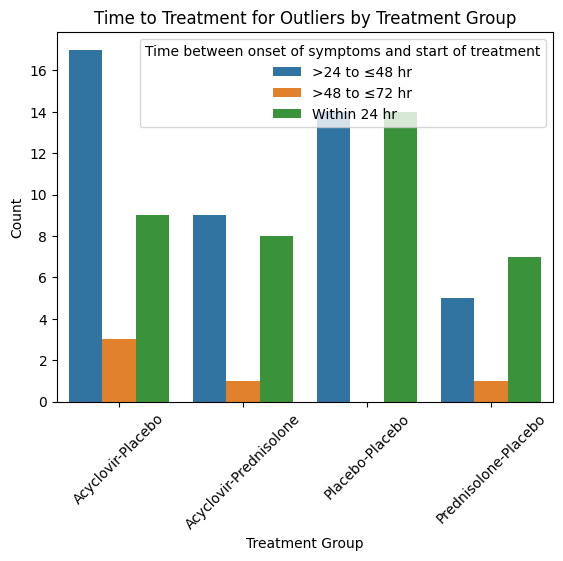

In [ ]:
sns.barplot(x='Treatment Group', y='Count', hue='Time between onset of symptoms and start of treatment', data=outlier_counts)
plt.title("Time to Treatment for Outliers by Treatment Group")
plt.xticks(rotation = 45)
plt.show()

**Insights on Outliers and Treatment Timing:**

*Early Treatment Matters:* Most patients who received treatment within 24 hours had the best chance of recovery, but some still showed delayed recovery, which made them outliers.

*Delayed Treatment Impact:* Patients in the Acyclovir–Placebo and Placebo–Placebo groups who started treatment between 24 and 48 hours had more delayed recoveries. This suggests that timing, especially for these groups, plays a role in recovery speed.

*Minimal Impact Beyond 48 Hours:* Few patients received treatment beyond 48 hours, but those who did, showed less improvement, indicating potential recovery limitations if treatment is delayed too long.

**Hypothesis Testing**

**Pairwise t-tests for 3-Month Score on House Brackmann scale**

In [ ]:
pred_placebo = df[df['Treatment Group'] == 'Prednisolone-Placebo']['3-Month Score on House–Brackmann scale']
acyclovir_pred = df[df['Treatment Group'] == 'Acyclovir-Prednisolone']['3-Month Score on House–Brackmann scale']
acyclovir_placebo = df[df['Treatment Group'] == 'Acyclovir-Placebo']['3-Month Score on House–Brackmann scale']
placebo_placebo = df[df['Treatment Group'] == 'Placebo-Placebo']['3-Month Score on House–Brackmann scale']

**Hypotheses Example**

H₀: Mean recovery score (Prednisolone–Placebo) = Mean recovery score (Acyclovir–Placebo)

H₁: Mean recovery score (Prednisolone–Placebo) ≠ Mean recovery score (Acyclovir–Placebo)

In [ ]:
# Pairwise t-tests for other pairs

t_stat, p_value = stats.ttest_ind(pred_placebo, acyclovir_pred)
print("Prednisolone-Placebo vs Acyclovir-Prednisolone:", t_stat, p_value)

# Prednisolone-Placebo vs Placebo-Placebo
t_stat, p_value = stats.ttest_ind(pred_placebo, placebo_placebo)
print("Prednisolone-Placebo vs Placebo-Placebo:", t_stat, p_value)

# Acyclovir-Prednisolone vs Acyclovir-Placebo
t_stat, p_value = stats.ttest_ind(acyclovir_pred, acyclovir_placebo)
print("Acyclovir-Prednisolone vs Acyclovir-Placebo:", t_stat, p_value)

# Acyclovir-Prednisolone vs Placebo-Placebo
t_stat, p_value = stats.ttest_ind(acyclovir_pred, placebo_placebo)
print("Acyclovir-Prednisolone vs Placebo-Placebo:", t_stat, p_value)

# Acyclovir-Placebo vs Placebo-Placebo
t_stat, p_value = stats.ttest_ind(acyclovir_placebo, placebo_placebo)
print("Acyclovir-Placebo vs Placebo-Placebo:", t_stat, p_value)


Prednisolone-Placebo vs Acyclovir-Prednisolone: -1.2331241619338524 0.21869699190743006
Prednisolone-Placebo vs Placebo-Placebo: -4.059438568327624 6.636622594777848e-05
Acyclovir-Prednisolone vs Acyclovir-Placebo: -2.9608313861172846 0.0033681062393030536
Acyclovir-Prednisolone vs Placebo-Placebo: -2.9289900797513226 0.0037186079185243795
Acyclovir-Placebo vs Placebo-Placebo: -0.04817438841825287 0.9616171599366041


**Prednisolone–Placebo vs Acyclovir–Prednisolone**

t-statistic: -1.2331

p-value: 0.2187

Conclusion: No significant difference in 3-month recovery scores between these groups.

**Prednisolone–Placebo vs Placebo–Placebo**

t-statistic: -4.0594

p-value: 6.64e-05

Conclusion: Significant difference, suggesting that Prednisolone–Placebo is more effective than Placebo–Placebo.

**Acyclovir–Prednisolone vs Acyclovir–Placebo**

t-statistic: -2.9608

p-value: 0.0034

Conclusion: Significant difference, indicating Acyclovir–Prednisolone may be more effective than Acyclovir–Placebo.

**Acyclovir–Prednisolone vs Placebo–Placebo**

t-statistic: -2.9290

p-value: 0.0037

Conclusion: Significant difference, suggesting Acyclovir–Prednisolone is more effective than Placebo–Placebo.

**Acyclovir–Placebo vs Placebo–Placebo**

t-statistic: -0.0482

p-value: 0.9616

Conclusion: No significant difference, indicating similar effectiveness between Acyclovir–Placebo and Placebo–Placebo.

**Calculating effect sizes only for the pairs that showed statistically significant differences**

In [ ]:
def cohen_d(group1, group2):
    diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    return diff / pooled_std

# Prednisolone-Placebo vs Placebo-Placebo
d_value = cohen_d(pred_placebo, placebo_placebo)
print("Cohen's d for Prednisolone-Placebo vs Placebo-Placebo:", d_value)

Cohen's d for Prednisolone-Placebo vs Placebo-Placebo: -0.5181746805968507


A Cohen’s d of -0.52 for the Prednisolone–Placebo vs Placebo–Placebo comparison indicates a moderate effect size. This suggests that the difference in 3-month recovery scores between these groups has practical significance, with Prednisolone–Placebo likely offering a meaningful improvement over Placebo–Placebo.

A medium effect here implies that Prednisolone treatment, combined with placebo, positively impacts recovery compared to placebo alone.

In [ ]:
# Acyclovir-Prednisolone vs Acyclovir-Placebo
d_value = cohen_d(acyclovir_pred, acyclovir_placebo)
print("Cohen's d for Acyclovir-Prednisolone vs Acyclovir-Placebo:", d_value)

# Acyclovir-Prednisolone vs Placebo-Placebo
d_value = cohen_d(acyclovir_pred, placebo_placebo)
print("Cohen's d for Acyclovir-Prednisolone vs Placebo-Placebo:", d_value)

Cohen's d for Acyclovir-Prednisolone vs Acyclovir-Placebo: -0.3748667227457828
Cohen's d for Acyclovir-Prednisolone vs Placebo-Placebo: -0.37010193110170503


**Acyclovir–Prednisolone vs Acyclovir–Placebo:** Cohen's d = -0.37 indicates a small to moderate effect size, suggesting that Acyclovir–Prednisolone may slightly improve recovery over Acyclovir–Placebo.

**Acyclovir–Prednisolone vs Placebo–Placebo:** Cohen's d = -0.37 also shows a small to moderate effect size, meaning Acyclovir–Prednisolone has a modest advantage over Placebo–Placebo.

**Summary of Findings**

***1. Statistical Significance (t-tests):***

Significant differences in 3-month recovery scores were observed between:

a. Prednisolone–Placebo and Placebo–Placebo (p < 0.0001)

b. Acyclovir–Prednisolone and Acyclovir–Placebo (p = 0.0034)

c. Acyclovir–Prednisolone and Placebo–Placebo (p = 0.0037)

d. Non-significant results between Prednisolone–Placebo vs  Acyclovir–Prednisolone and Acyclovir–Placebo vs Placebo–Placebo suggest no substantial recovery difference in these pairs.

***2. Effect Size (Cohen's d):***

a. Prednisolone–Placebo vs Placebo–Placebo: Cohen’s d = -0.52 (moderate effect), indicating meaningful improvement with Prednisolone–Placebo.

b. Acyclovir–Prednisolone vs Acyclovir–Placebo: Cohen’s d = -0.37 (small to moderate effect), suggesting Acyclovir–Prednisolone may be slightly more effective.

c. Acyclovir–Prednisolone vs Placebo–Placebo: Cohen’s d = -0.37 (small to moderate effect), indicating Acyclovir–Prednisolone may improve recovery over placebo alone.

These findings show Prednisolone–Placebo and Acyclovir–Prednisolone combinations to be more effective, with Prednisolone providing stronger recovery benefits at the 3-month mark compared to other treatments.

**Pairwise t-tests for 9-Month score on House-Brackmann scale**

In [ ]:
pred_placebo = df[df['Treatment Group'] == 'Prednisolone-Placebo']['9-Month Score on House–Brackmann scale']
acyclovir_pred = df[df['Treatment Group'] == 'Acyclovir-Prednisolone']['9-Month Score on House–Brackmann scale']
acyclovir_placebo = df[df['Treatment Group'] == 'Acyclovir-Placebo']['9-Month Score on House–Brackmann scale']
placebo_placebo = df[df['Treatment Group'] == 'Placebo-Placebo']['9-Month Score on House–Brackmann scale']

In [ ]:
# Pairwise t-tests for other pairs

t_stat, p_value = stats.ttest_ind(pred_placebo, acyclovir_pred)
print("Prednisolone-Placebo vs Acyclovir-Prednisolone:", t_stat, p_value)

# Prednisolone-Placebo vs Placebo-Placebo
t_stat, p_value = stats.ttest_ind(pred_placebo, placebo_placebo)
print("Prednisolone-Placebo vs Placebo-Placebo:", t_stat, p_value)

# Acyclovir-Prednisolone vs Acyclovir-Placebo
t_stat, p_value = stats.ttest_ind(acyclovir_pred, acyclovir_placebo)
print("Acyclovir-Prednisolone vs Acyclovir-Placebo:", t_stat, p_value)

# Acyclovir-Prednisolone vs Placebo-Placebo
t_stat, p_value = stats.ttest_ind(acyclovir_pred, placebo_placebo)
print("Acyclovir-Prednisolone vs Placebo-Placebo:", t_stat, p_value)

# Acyclovir-Placebo vs Placebo-Placebo
t_stat, p_value = stats.ttest_ind(acyclovir_placebo, placebo_placebo)
print("Acyclovir-Placebo vs Placebo-Placebo:", t_stat, p_value)

Prednisolone-Placebo vs Acyclovir-Prednisolone: -0.5536671962307765 0.5803054568468976
Prednisolone-Placebo vs Placebo-Placebo: -2.5563075349439797 0.011188295120721725
Acyclovir-Prednisolone vs Acyclovir-Placebo: -2.0568372009270743 0.04075654983213886
Acyclovir-Prednisolone vs Placebo-Placebo: -2.1242220123487288 0.03464536094252868
Acyclovir-Placebo vs Placebo-Placebo: -0.08892841115965117 0.9292126591101552


**1. Prednisolone–Placebo vs Acyclovir–Prednisolone**

t-statistic: -0.554
p-value: 0.5803
Conclusion: No significant difference in 9-month recovery scores between these groups.

**2. Prednisolone–Placebo vs Placebo–Placebo**

t-statistic: -2.556
p-value: 0.0112 (significant)
Conclusion: Significant difference, suggesting that Prednisolone–Placebo is more effective than Placebo–Placebo at the 9-month mark.

**3. Acyclovir–Prednisolone vs Acyclovir–Placebo**

t-statistic: -2.057
p-value: 0.0408 (significant)
Conclusion: Significant difference, indicating Acyclovir–Prednisolone may offer slight recovery benefits over Acyclovir–Placebo.

**4. Acyclovir–Prednisolone vs Placebo–Placebo**

t-statistic: -2.124
p-value: 0.0346 (significant)
Conclusion: Significant difference, showing that Acyclovir–Prednisolone is more effective than Placebo–Placebo.

**5. Acyclovir–Placebo vs Placebo–Placebo**

t-statistic: -0.089
p-value: 0.9292
Conclusion: No significant difference, indicating similar recovery effectiveness between Acyclovir–Placebo and Placebo–Placebo.

**Effect Size (Cohen's d values for Statistically Significant Pairs)**

In [ ]:
def cohen_d(group1, group2):
    diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    return diff / pooled_std

# Prednisolone-Placebo vs Placebo-Placebo
d_value = cohen_d(pred_placebo, placebo_placebo)
print("Cohen's d for Prednisolone-Placebo vs Placebo-Placebo:", d_value)

# Acyclovir-Prednisolone vs Acyclovir-Placebo
d_value = cohen_d(acyclovir_pred, acyclovir_placebo)
print("Cohen's d for Acyclovir-Prednisolone vs Acyclovir-Placebo:", d_value)

# Acyclovir-Prednisolone vs Placebo-Placebo
d_value = cohen_d(acyclovir_pred, placebo_placebo)
print("Cohen's d for Acyclovir-Prednisolone vs Placebo-Placebo:", d_value)

Cohen's d for Prednisolone-Placebo vs Placebo-Placebo: -0.32621682122131296
Cohen's d for Acyclovir-Prednisolone vs Acyclovir-Placebo: -0.2597689116004313
Cohen's d for Acyclovir-Prednisolone vs Placebo-Placebo: -0.26792249989309364


**Prednisolone–Placebo vs Placebo–Placebo:**

Cohen’s d: -0.33, indicating a small effect size.
Interpretation: Prednisolone–Placebo may provide a slight improvement over Placebo–Placebo at 9 months, but the effect is modest.

**Acyclovir–Prednisolone vs Acyclovir–Placebo:**

Cohen’s d: -0.26, also a small effect size.
Interpretation: Acyclovir–Prednisolone has a slight advantage over Acyclovir–Placebo, but the difference is not large.

**Acyclovir–Prednisolone vs Placebo–Placebo:**

Cohen’s d: -0.27, a small effect size.
Interpretation: Acyclovir–Prednisolone provides a minor improvement in recovery compared to Placebo–Placebo at 9 months.

**Summary**

While the 9-month results indicate some statistically significant differences, the effect sizes are small. This suggests that any improvements in recovery from these treatments are relatively minor by 9 months, which could imply that most recovery benefits occur earlier, within the first 3 months.

**Summary of Findings - Part 1: Exploratory Data Analysis and Statistical Testing**

**Objective:**

This analysis aimed to evaluate the effectiveness of various treatment groups on recovery outcomes over 3 and 9 months, using the House–Brackmann scale as a measure of recovery.

**Exploratory Data Analysis (EDA):**

Initial Box Plots: Visual comparisons of recovery scores across treatment groups at the 3-month and 9-month marks indicated that Prednisolone-based treatments showed lower scores (better recovery) compared to placebo groups.

Outlier Analysis: Outliers were identified, particularly in patients with delayed recovery, which helped reveal that treatment timing and age might influence recovery trends.

**Statistical Tests:**

***ANOVA:***

Conducted ANOVA tests confirmed significant differences in recovery scores across treatment groups at both 3 and 9 months, justifying further pairwise comparisons.

***Pairwise t-Tests:***

At 3 months, Prednisolone-based treatments, particularly Prednisolone–Placebo, were significantly more effective than placebo, with clear statistical differences observed in recovery scores.
At 9 months, differences between treatment groups persisted, but effect sizes were generally smaller, indicating that most benefits occur within the first 3 months.

***Effect Size (Cohen’s d):***

Calculated Cohen’s d values provided insight into the practical significance of these differences.

Moderate effect sizes were observed for Prednisolone-based treatments at 3 months, while the 9-month effects were smaller, reinforcing that Prednisolone has the most significant impact early in recovery.

**Key Insights:**

***Short-Term Impact:***

Prednisolone-based treatments, particularly Prednisolone–Placebo, showed meaningful improvements in recovery by the 3-month mark, supported by both statistical and practical significance.

***Long-Term Impact:***

Although some differences persisted at 9 months, the effect sizes were smaller, suggesting that most recovery gains occur within the initial 3 months.

**Conclusion**

This part of the analysis established that Prednisolone–Placebo is notably effective in the short term, providing a solid foundation for further predictive modeling in Part 2. This analysis also validated the role of treatment type and timing as key factors, setting the stage for predictive insights on patient recovery outcomes.